# Количественные метрики выручки на рынке оказания оценочных услуг за период с 2005 по 2023

Все использованные данные о выручке крупнейших компаний на рынке оказания услуг по оценке были взяты с сайта рейтинговой группы RAEX. Они доступны по [ссылке](https://raex-rr.com/b2b/evaluation/largest_appraisal_organizations/2023/).

## Начало работы

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns
from scipy.stats import pearsonr, spearmanr, kendalltau

In [6]:
# Load dataset
data = pd.read_csv("data.csv")

# Sort each column independently
sorted_data = data.apply(lambda x: x.sort_values(ascending=False).reset_index(drop=True), axis=0)

sorted_data

,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,231309.0,302524,500525.0,637069.0,650750.0,674027.0,698204.0,2535638.0,838261.0,833966.0,838201.0,603938.0,534859.0,266537.0,1122000.0,294372.0,1197977.0,1421235.0,1420436.0
1,190849.0,285863,448141.0,630445.0,537311.0,563244.0,681525.0,830597.0,756321.0,519185.0,524825.0,501770.0,337568.0,247460.0,697051.0,276214.0,944798.0,1018133.0,1014718.0
2,138725.0,279632,372939.0,521068.0,479908.0,558199.0,670822.0,721602.0,602126.0,474030.0,493096.0,402001.0,308058.0,229233.0,275914.0,208127.0,745903.0,715155.0,729687.0
3,126886.0,270113,354892.0,511238.0,473985.0,471002.0,640644.0,601000.0,595877.0,451112.0,484597.0,307566.0,305310.0,167831.0,259482.0,198117.0,332596.0,441416.0,477150.0
4,107445.0,189184,320636.0,398857.0,462377.0,462321.0,460160.0,577809.0,493613.0,441776.0,466041.0,252821.0,250290.0,161903.0,243323.0,193559.0,327636.0,370820.0,423434.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,NaN,1660,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
139,NaN,1411,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
140,NaN,960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
141,NaN,811,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


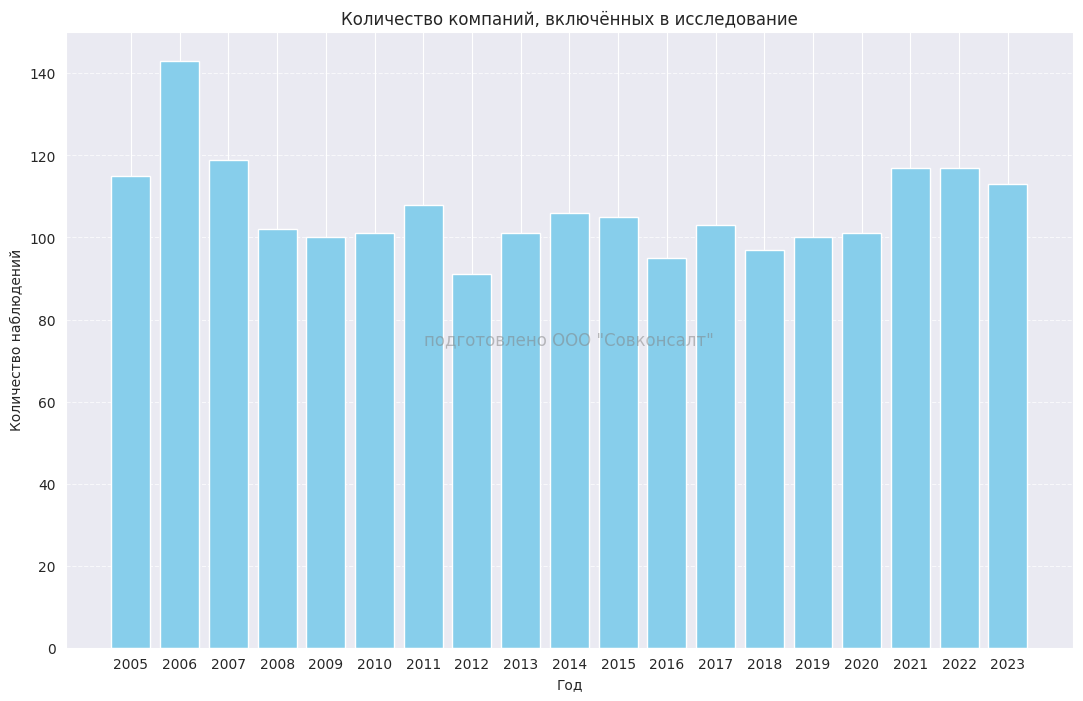

In [7]:
# Calculate the number of non-NA observations per column
non_na_counts = data.notna().sum()

# Plotting
plt.figure(figsize=(13, 8))
plt.bar(non_na_counts.index, non_na_counts.values, color='skyblue')
# Adding a watermark
plt.text(0.5, 0.5, 'подготовлено ООО "Совконсалт"',
         fontsize=12, color='gray', ha='center', va='center', alpha=0.5, transform=plt.gca().transAxes)
plt.xlabel('Год')
plt.ylabel('Количество наблюдений')
plt.title('Количество компаний, включённых в исследование')
plt.xticks()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Анализ номинальных рублёвых индикаторов отрасли

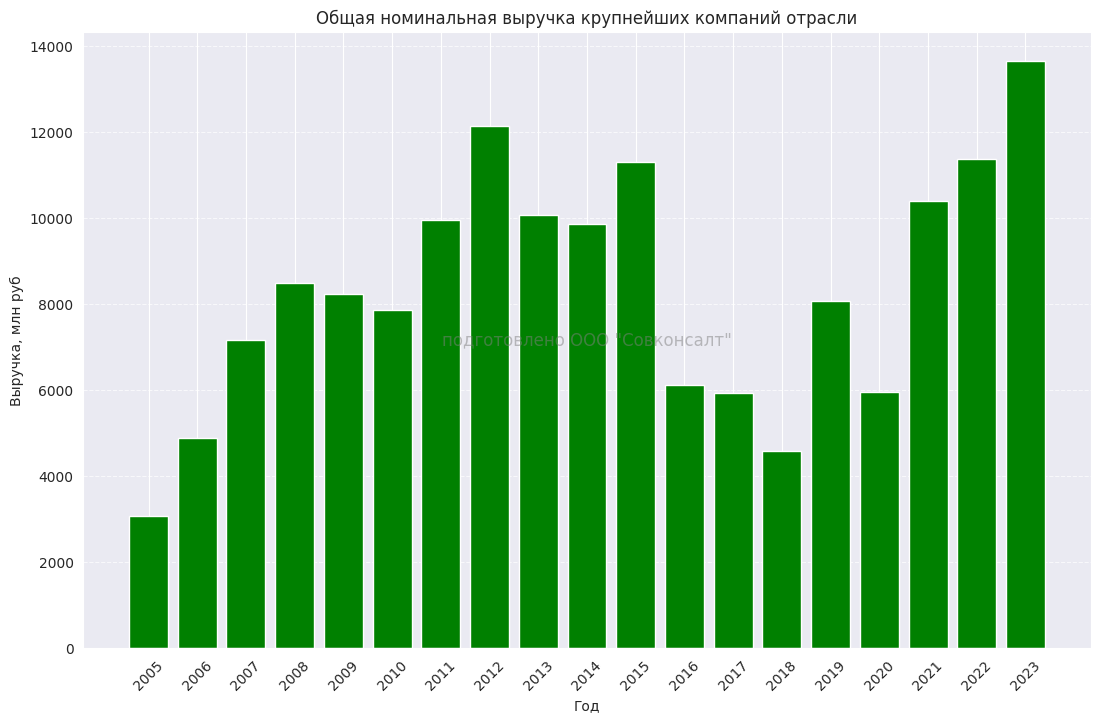

In [8]:
# Calculate the total revenue per column
total_revenue_by_year = data.sum()

# Calculate the total revenue per column
total_revenue_by_year = data.sum()

# Helper function to format the y-axis labels
def millions_formatter(x, pos):
    return f'{x / 1_000:.0f}' 

# Plotting
plt.figure(figsize=(13, 8))  
plt.bar(total_revenue_by_year.index, total_revenue_by_year.values, color='green')
# Adding a watermark
plt.text(0.5, 0.5, 'подготовлено ООО "Совконсалт"',
         fontsize=12, color='gray', ha='center', va='center', alpha=0.5, transform=plt.gca().transAxes)
plt.xlabel('Год')
plt.ylabel('Выручка, млн руб')
plt.title('Общая номинальная выручка крупнейших компаний отрасли')
plt.xticks(rotation=45)  
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_formatter))  
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

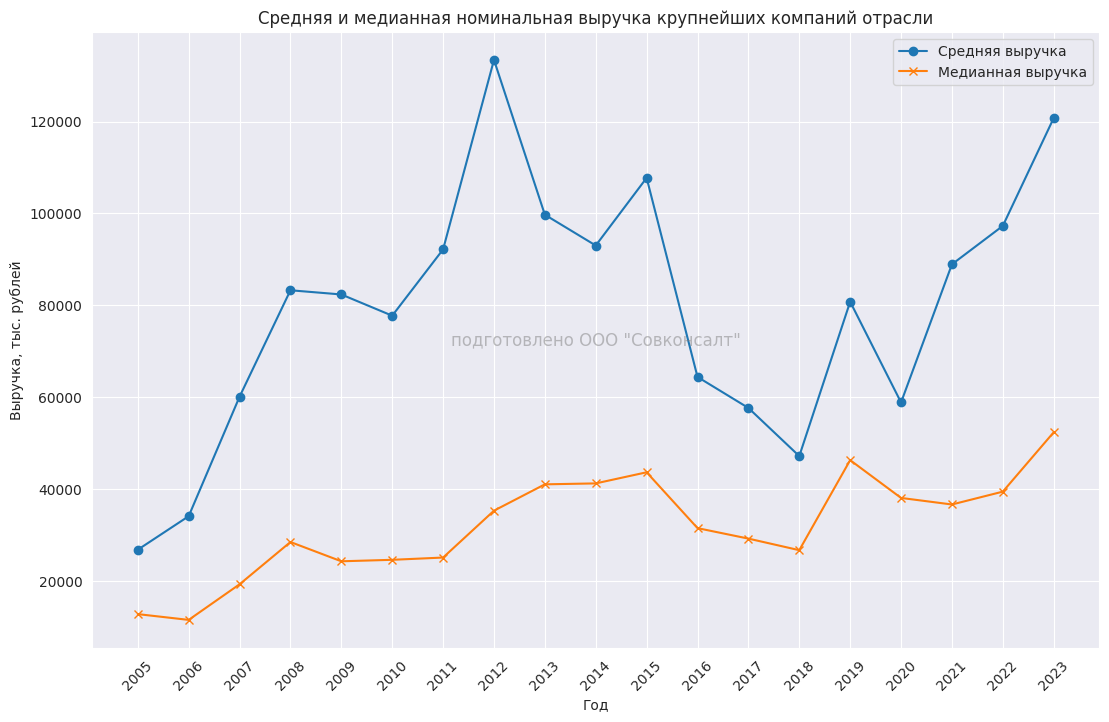

In [9]:
# Calculate mean and median revenues per year
mean_revenues = data.mean()
median_revenues = data.median()

# Plotting both on the same chart
plt.figure(figsize=(13, 8))
plt.plot(mean_revenues.index, mean_revenues.values, label='Средняя выручка', marker='o')
plt.plot(median_revenues.index, median_revenues.values, label='Медианная выручка', marker='x')
# Adding a watermark
plt.text(0.5, 0.5, 'подготовлено ООО "Совконсалт"',
         fontsize=12, color='gray', ha='center', va='center', alpha=0.5, transform=plt.gca().transAxes)
plt.xlabel('Год')
plt.ylabel('Выручка, тыс. рублей')
plt.title('Средняя и медианная номинальная выручка крупнейших компаний отрасли')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

Как видно из графика, в период с 2012 по 2018 год имела место позитивная тенденция сокращения разрыва между средним и медианным значениями. С 2018 начался негативный тренд на увеличение этого разрыва, т.е. опережающего усиления роста у самых крупных компаний.

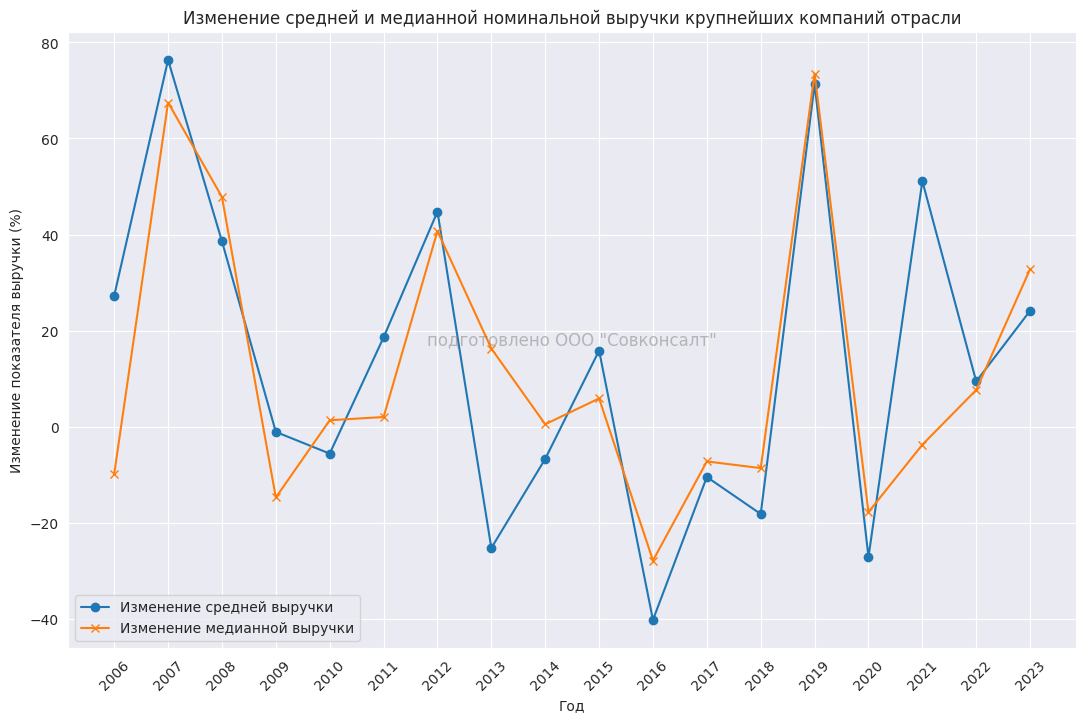

In [10]:
# Calculate year-over-year percentage changes for mean and median revenues
mean_revenue_changes = mean_revenues.pct_change().dropna() * 100
median_revenue_changes = median_revenues.pct_change().dropna() * 100

# Plotting the changes on the same chart
plt.figure(figsize=(13, 8))
plt.plot(mean_revenue_changes.index, mean_revenue_changes.values,
         label='Изменение средней выручки', marker='o')
plt.plot(median_revenue_changes.index, median_revenue_changes.values,
         label='Изменение медианной выручки', marker='x')
# Adding a watermark
plt.text(0.5, 0.5, 'подготовлено ООО "Совконсалт"',
         fontsize=12, color='gray', ha='center', va='center', alpha=0.5, transform=plt.gca().transAxes)
plt.xlabel('Год')
plt.ylabel('Изменение показателя выручки (%)')
plt.title('Изменение средней и медианной номинальной выручки крупнейших компаний отрасли')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

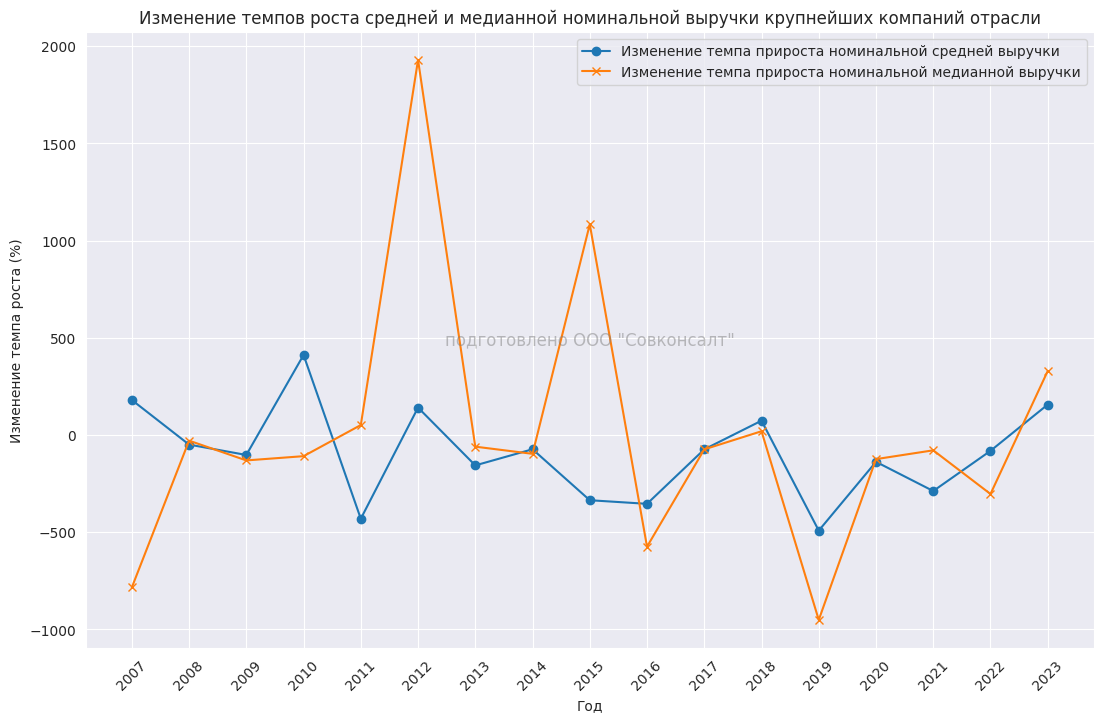

In [11]:
# Calculate the changes in the year-over-year changes (second derivative)
second_derivative_mean = mean_revenue_changes.pct_change().dropna() * 100
second_derivative_median = median_revenue_changes.pct_change().dropna() * 100

# Plotting the changes on the same chart
plt.figure(figsize=(13, 8))
plt.plot(second_derivative_mean.index, second_derivative_mean.values,
         label='Изменение темпа прироста номинальной средней выручки', marker='o')
plt.plot(second_derivative_median.index, second_derivative_median.values,
         label='Изменение темпа прироста номинальной медианной выручки', marker='x')
# Adding a watermark
plt.text(0.5, 0.5, 'подготовлено ООО "Совконсалт"',
         fontsize=12, color='gray', ha='center', va='center', alpha=0.5, transform=plt.gca().transAxes)
plt.xlabel('Год')
plt.ylabel('Изменение темпа роста (%)')
plt.title('Изменение темпов роста средней и медианной номинальной выручки крупнейших компаний отрасли')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()
plt.grid(True)
plt.show()

Как видно из графика, с 2018 года наблюдается тенденция на замедление темпов роста, что может указывать на ожидаемую стагнацию в отрасли.

## Анализ реальных рублёвых показателей

Рассчитаем реальные показатели выручки. В качестве базовой даты (даты, по состоянию на которую индекс цен равен единице) будет использована дата 2013-01-01.

In [12]:
# Load the CPI data
cpi = pd.read_csv("cpi.csv")
cpi.set_index('year', inplace=True)

# Set the base year
base_year = 2013

# Initialize the CPI index at the base year
cpi['CPI_index'] = 1.0

# Calculate CPI index for years after the base year
for year in range(base_year + 1, cpi.index.max() + 1):
    cpi.at[year, 'CPI_index'] = cpi.at[year - 1, 'CPI_index'] * (1 + cpi.at[year, 'inflation']/100)

# Calculate CPI index for years before the base year
for year in range(base_year - 1, cpi.index.min() - 1, -1):
    cpi.at[year, 'CPI_index'] = cpi.at[year + 1, 'CPI_index'] / (1 + cpi.at[year, 'inflation']/100)

In [13]:
# Apply the CPI index to adjust revenues
real_revenues = pd.DataFrame()
for year in data.columns:
    year_int = int(year)
    if year_int in cpi.index:
        real_revenues[year] = data[year] / cpi.at[year_int, 'CPI_index']

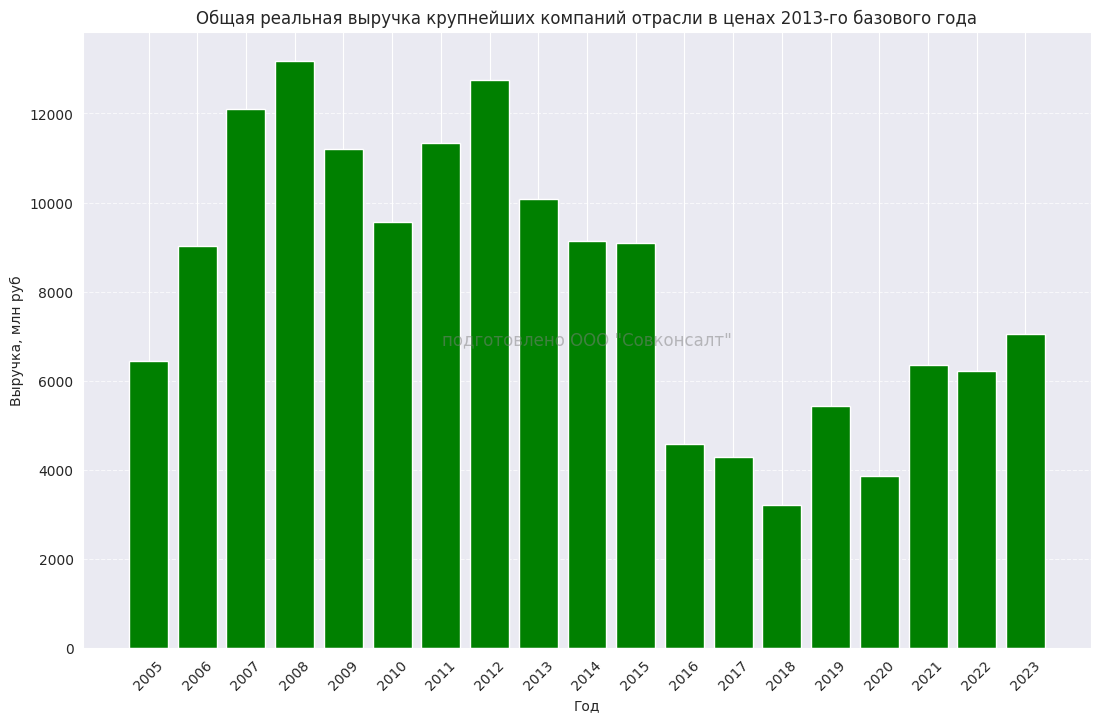

In [14]:
# Calculate the total revenue per column
real_total_revenue_by_year = real_revenues.sum()

# Helper function to format the y-axis labels
def millions_formatter(x, pos):
    return f'{x / 1_000:.0f}' 

# Plotting
plt.figure(figsize=(13, 8))  
plt.bar(real_total_revenue_by_year.index, real_total_revenue_by_year.values, color='green')
# Adding a watermark
plt.text(0.5, 0.5, 'подготовлено ООО "Совконсалт"',
         fontsize=12, color='gray', ha='center', va='center', alpha=0.5, transform=plt.gca().transAxes)
plt.xlabel('Год')
plt.ylabel('Выручка, млн руб')
plt.title('Общая реальная выручка крупнейших компаний отрасли в ценах 2013-го базового года')
plt.xticks(rotation=45)  
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_formatter))  
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Как видно из диаграммы, текущее состояние отрасли находится на уровне начала-середины 2000-х годов.

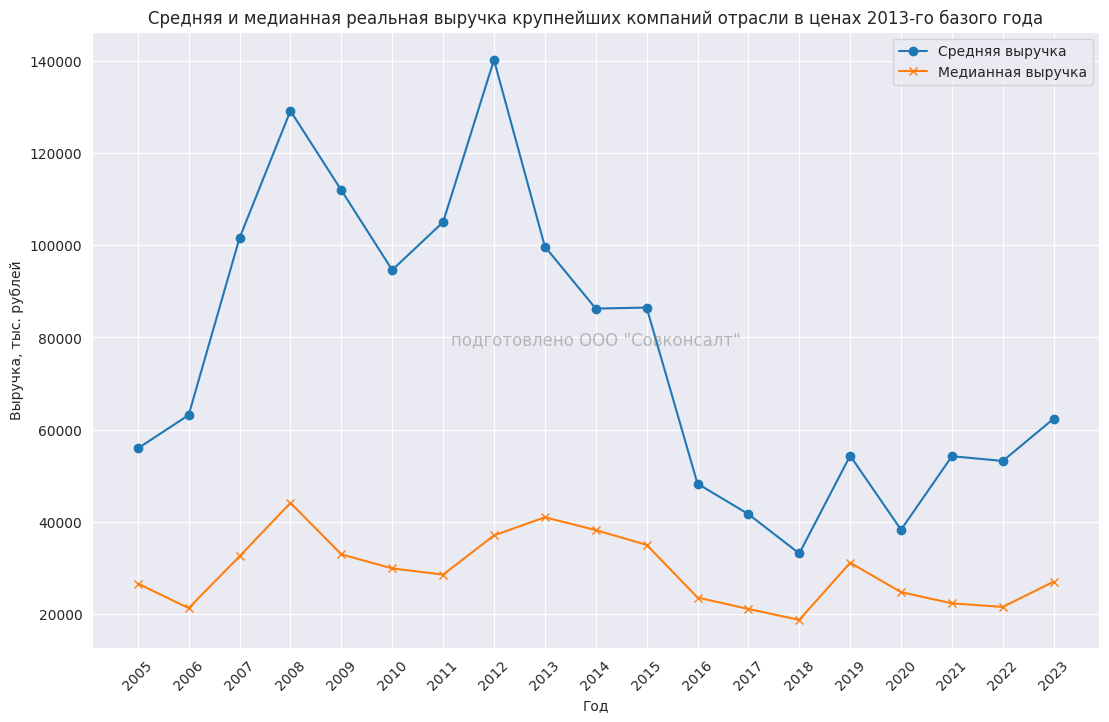

In [15]:
# Calculate mean and median revenues per year
real_mean_revenues = real_revenues.mean()
real_median_revenues = real_revenues.median()

# Plotting both on the same chart
plt.figure(figsize=(13, 8))
plt.plot(real_mean_revenues.index, real_mean_revenues.values,
         label='Средняя выручка', marker='o')
plt.plot(real_median_revenues.index, real_median_revenues.values,
         label='Медианная выручка', marker='x')
# Adding a watermark
plt.text(0.5, 0.5, 'подготовлено ООО "Совконсалт"',
         fontsize=12, color='gray', ha='center', va='center', alpha=0.5, transform=plt.gca().transAxes)
plt.xlabel('Год')
plt.ylabel('Выручка, тыс. рублей')
plt.title('Средняя и медианная реальная выручка крупнейших компаний отрасли в ценах 2013-го базого года')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

Как видно, из графика, реальные доходы оценочных компаний ниже, чем они были в середине 2000-х годов. Отрасль находится в сложном положении и требует серьёзные реформы.

## Анализ номинальных долларовых показателей

In [16]:
# Load the currency rate data
currency_rate = pd.read_csv("currencies.csv")
currency_rate.set_index('year', inplace=True)

# Initialize a new DataFrame for the USD-adjusted revenues
nominal_usd_revenue = pd.DataFrame()

# Adjust the revenues for each year using the corresponding USD exchange rate
for year in data.columns:
    year_int = int(year)
    if year_int in currency_rate.index and year_int <= 2023:
        nominal_usd_revenue[year] = data[year] / currency_rate.at[year_int, 'USD']

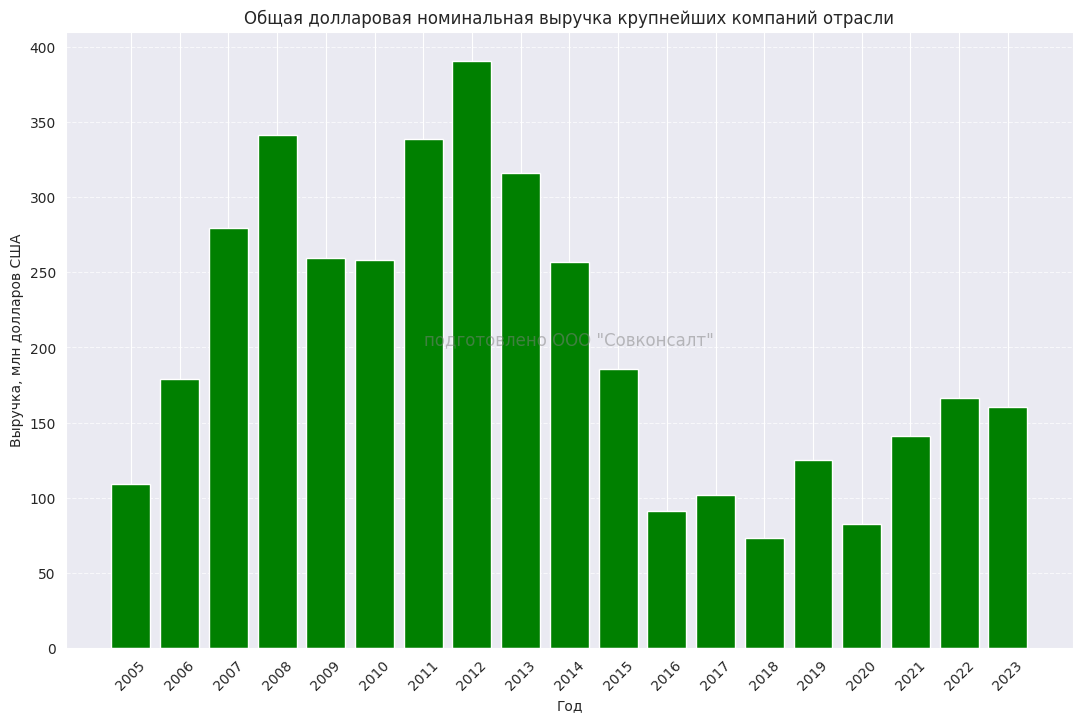

In [17]:
# Calculate the total revenue per column
nominal_usd_revenue_by_year = nominal_usd_revenue.sum()

# Helper function to format the y-axis labels
def millions_formatter(x, pos):
    return f'{x / 1_000:.0f}' 

# Plotting
plt.figure(figsize=(13, 8))  
plt.bar(nominal_usd_revenue_by_year.index, nominal_usd_revenue_by_year.values, color='green')
# Adding a watermark
plt.text(0.5, 0.5, 'подготовлено ООО "Совконсалт"',
         fontsize=12, color='gray', ha='center', va='center', alpha=0.5, transform=plt.gca().transAxes)
plt.xlabel('Год')
plt.ylabel('Выручка, млн долларов США')
plt.title('Общая долларовая номинальная выручка крупнейших компаний отрасли')
plt.xticks(rotation=45)  
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_formatter))  
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

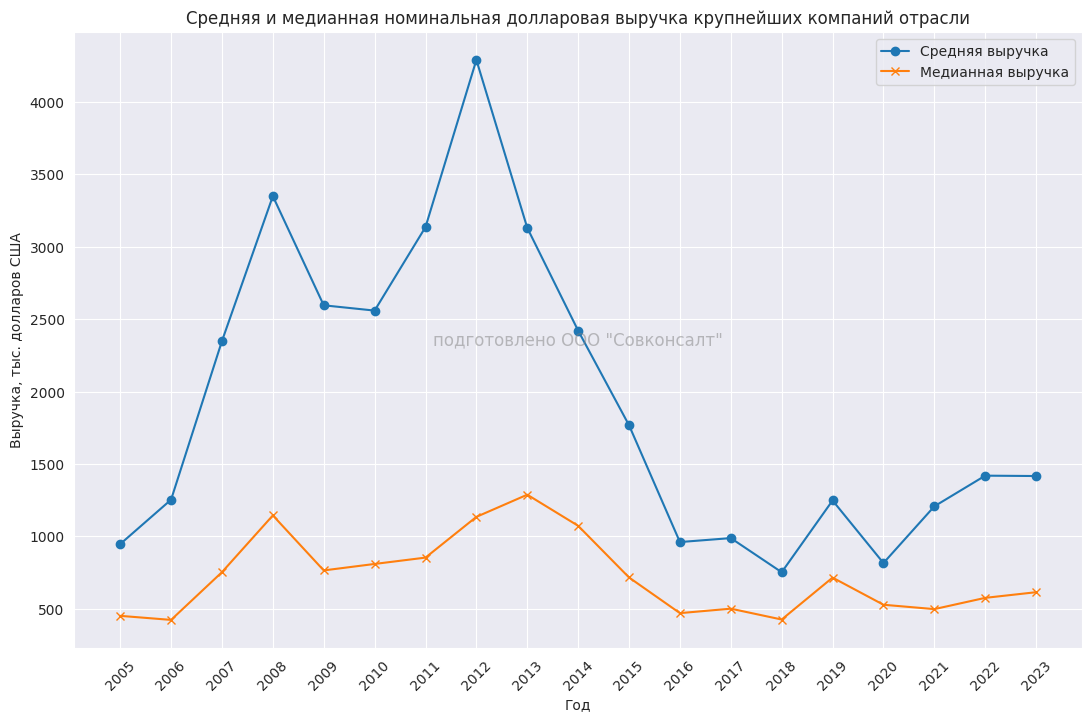

In [18]:
# Calculate mean and median revenues per year
usd_mean_revenues = nominal_usd_revenue.mean()
usd_median_revenues = nominal_usd_revenue.median()

# Plotting both on the same chart
plt.figure(figsize=(13, 8))
plt.plot(usd_mean_revenues.index, usd_mean_revenues.values,
         label='Средняя выручка', marker='o')
plt.plot(usd_median_revenues.index, usd_median_revenues.values,
         label='Медианная выручка', marker='x')
# Adding a watermark
plt.text(0.5, 0.5, 'подготовлено ООО "Совконсалт"',
         fontsize=12, color='gray', ha='center', va='center', alpha=0.5, transform=plt.gca().transAxes)
plt.xlabel('Год')
plt.ylabel('Выручка, тыс. долларов США')
plt.title('Средняя и медианная номинальная долларовая выручка крупнейших компаний отрасли')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

## Анализ реальных долларовых показателей

Рассчитаем реальные долларовые показатели выручки. В качестве базовой даты (даты, по состоянию на которую индекс цен равен единице) будет использована дата 2013-01-01.

In [19]:
# Load the CPI data
us_cpi = pd.read_csv("us_cpi.csv")
us_cpi.set_index('year', inplace=True)

# Set the base year
base_year = 2013

# Initialize the CPI index at the base year
us_cpi['CPI_index'] = 1.0

# Calculate CPI index for years after the base year
for year in range(base_year + 1, us_cpi.index.max() + 1):
    us_cpi.at[year, 'CPI_index'] = us_cpi.at[year - 1, 'CPI_index'] * (1 + us_cpi.at[year, 'cpi']/100)

# Calculate CPI index for years before the base year
for year in range(base_year - 1, us_cpi.index.min() - 1, -1):
    us_cpi.at[year, 'CPI_index'] = us_cpi.at[year + 1, 'CPI_index'] / (1 + us_cpi.at[year, 'cpi']/100)

In [20]:
# Apply the CPI index to adjust revenues
usd_real_revenues = pd.DataFrame()
for year in nominal_usd_revenue.columns:
    year_int = int(year)
    if year_int in cpi.index:
        usd_real_revenues[year] = nominal_usd_revenue[year] / us_cpi.at[year_int, 'CPI_index']

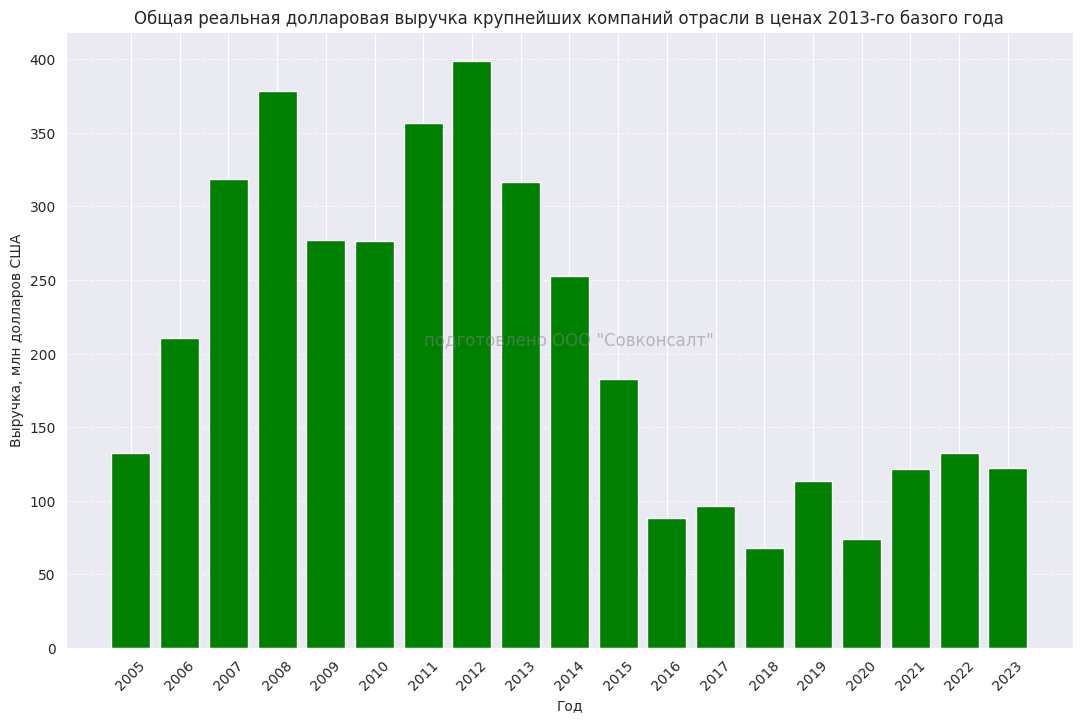

In [21]:
# Calculate the total revenue per column
usd_real_total_revenue_by_year = usd_real_revenues.sum()

# Helper function to format the y-axis labels
def millions_formatter(x, pos):
    return f'{x / 1_000:.0f}' 

# Plotting
plt.figure(figsize=(13, 8))  
plt.bar(usd_real_total_revenue_by_year.index, usd_real_total_revenue_by_year.values, color='green')
# Adding a watermark
plt.text(0.5, 0.5, 'подготовлено ООО "Совконсалт"',
         fontsize=12, color='gray', ha='center', va='center', alpha=0.5, transform=plt.gca().transAxes)
plt.xlabel('Год')
plt.ylabel('Выручка, млн долларов США')
plt.title('Общая реальная долларовая выручка крупнейших компаний отрасли в ценах 2013-го базого года')
plt.xticks(rotation=45)  
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_formatter))  
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

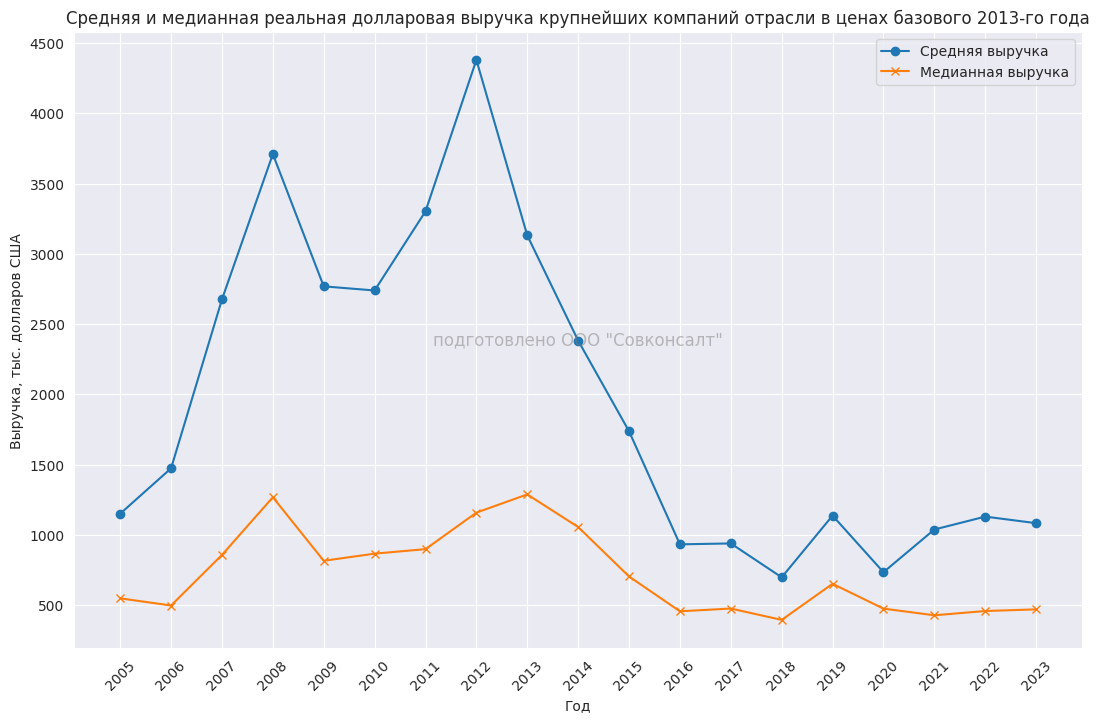

In [22]:
# Calculate mean and median revenues per year
usd_real_mean_revenues = usd_real_revenues.mean()
usd_real_median_revenues = usd_real_revenues.median()

# Plotting both on the same chart
plt.figure(figsize=(13, 8))
plt.plot(usd_real_mean_revenues.index, usd_real_mean_revenues.values,
         label='Средняя выручка', marker='o')
plt.plot(usd_real_median_revenues.index, usd_real_median_revenues.values,
         label='Медианная выручка', marker='x')
# Adding a watermark
plt.text(0.5, 0.5, 'подготовлено ООО "Совконсалт"',
         fontsize=12, color='gray', ha='center', va='center', alpha=0.5, transform=plt.gca().transAxes)
plt.xlabel('Год')
plt.ylabel('Выручка, тыс. долларов США')
plt.title('Средняя и медианная реальная долларовая выручка крупнейших компаний отрасли в ценах базового 2013-го года')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

## Вопросы неравенства

В качестве меры неравенства в отрасли будут использованы значения Индексап Джини, а также Индекса Херфиндаля-Хиршмана.

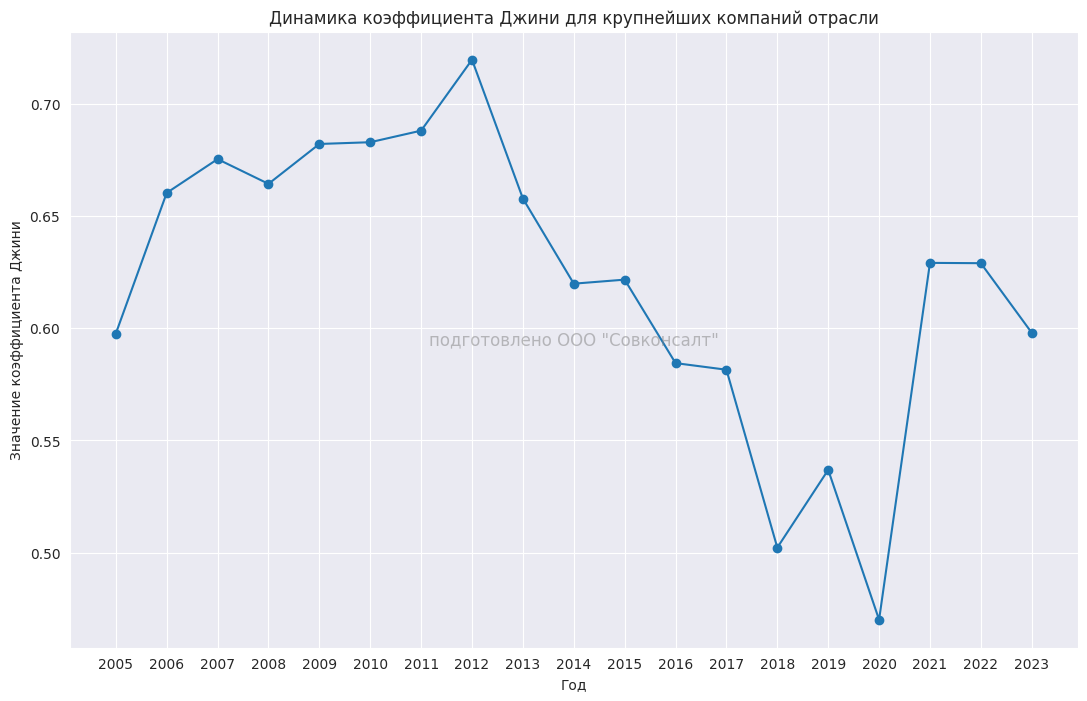

In [23]:
def gini(array):
    """Calculate the Gini coefficient of a numpy array."""
    # Array must be 1d and not contain negative values
    array = array.flatten()
    if np.amin(array) < 0:
        array -= np.amin(array)
    # All values are zero means no inequality
    if np.sum(array) == 0:
        return 0
    # Values must be sorted
    array = np.sort(array)
    # Index per array element
    index = np.arange(1, array.shape[0]+1)
    # Number of array elements
    n = array.shape[0]
    # Gini coefficient
    return (np.sum((2 * index - n - 1) * array)) / (n * np.sum(array))

# Calculate Gini coefficients for each year
gini_coefficients = {}
for year in data.columns:
    gini_coefficients[year] = gini(data[year].dropna().values)

# Convert the dictionary to a DataFrame for easier plotting
gini_df = pd.DataFrame(list(gini_coefficients.items()), columns=['year', 'gini_coef'])

# Plotting
plt.figure(figsize=(13, 8))
plt.plot(gini_df['year'], gini_df['gini_coef'], marker='o')
# Adding a watermark
plt.text(0.5, 0.5, 'подготовлено ООО "Совконсалт"',
         fontsize=12, color='gray', ha='center', va='center', alpha=0.5, transform=plt.gca().transAxes)
plt.xlabel('Год')
plt.ylabel('Значение коэффициента Джини')
plt.title('Динамика коэффициента Джини для крупнейших компаний отрасли')
plt.grid(True)
plt.show()

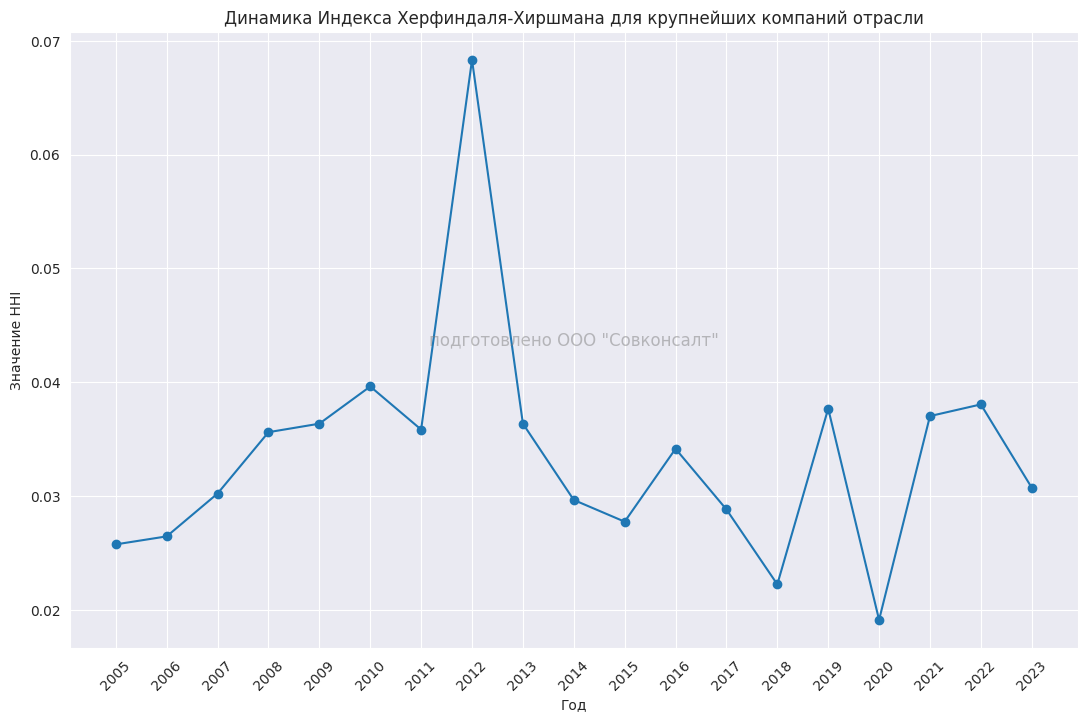

In [24]:
# Calculate market shares
market_shares = data.div(data.sum())

# Calculate the HHI for each year
HHI = (market_shares**2).sum()

# Plotting the HHI
plt.figure(figsize=(13, 8))
plt.plot(HHI.index, HHI.values, marker='o')  
plt.title('Динамика Индекса Херфиндаля-Хиршмана для крупнейших компаний отрасли')
# Adding a watermark
plt.text(0.5, 0.5, 'подготовлено ООО "Совконсалт"',
         fontsize=12, color='gray', ha='center', va='center', alpha=0.5, transform=plt.gca().transAxes)
plt.xlabel('Год')
plt.ylabel('Значение HHI')
plt.xticks(rotation=45)
plt.grid(True)

# Set x-ticks to display every year
plt.xticks(ticks=HHI.index, labels=HHI.index)

plt.show()

Оба индикатора показывают, что в период с 2013 по 2020 годы имел место положительны процесс роста конкуренции и доли малых компаний из списка. С 2020 года начался процесс умеренной концентрации. Однако текущее значение индекса Херфиндаля-Хиршмана говорит о том, что рынок по-прежнему достаточно конкурентный.

## Индикаторы связи между показателями выручки и кадровой политикой

Загрузим данные о индикаторах выручки и персонала.

In [25]:
# Load the data with correct parsing of numbers
revenue_staff = pd.read_csv("revenue_staff.csv", thousands=',')

# Ensure that the 'revenue' column is included and check for numeric columns
numeric_columns = ['revenue', 'total_staff', 'own_staff', 'own_ratio', 'certificates',
                   'cert_per_capita', 'full_certified', 'revenue_per_capita',
                   'revenue_per_own_capita', 'revenue_per_certificate',
                   'revenue_per_full_certified']

# Verify each column in numeric_columns is both in the DataFrame and numeric
numeric_columns = [col for col in numeric_columns if col in revenue_staff.columns and pd.api.types.is_numeric_dtype(revenue_staff[col])]




В дальнейшем будут использованы технические названия переменных. Значение каждой из них приведено ниже.

| Variable              | Description                                                                                                  |
|:-----------------------|:-------------------------------------------------------------------------------------------------------------|
| `revenue`             | Выручка в 2023 году                                                                                          |
| `total_staff`         | Общая численность сотрудников                                                                                |
| `own_staff`           | Количество сотрудников по основному месту работы                                                             |
| `own_ratio`           | Доля сотрудников по основному месту работы                                                                   |
| `certificates`        | Общее количество действующих квалификационных аттестатов сотрудников                                         |
| `cert_per_capita`     | Количество аттестатов на одного сотрудника                                                                   |
| `full_certified`      | Количество сотрудников, имеющих три аттестата и опыт работы от 10 лет                                        |
| `revenue_per_capital` | Выручка на одного сотрудника, млн руб.                                                                       |
| `revenue_per_own_capita` | Выручка на одного сотрудника, работающего по основному месту                                                 |
| `revenue_per_certificate` | Выручка на один квалификационный аттестат                                                                    |
| `revenue_per_full_certified` | Выручка на одного сотрудника, имеющего три квалификационных аттестата и опыт работы в оценке не менее 10 лет |


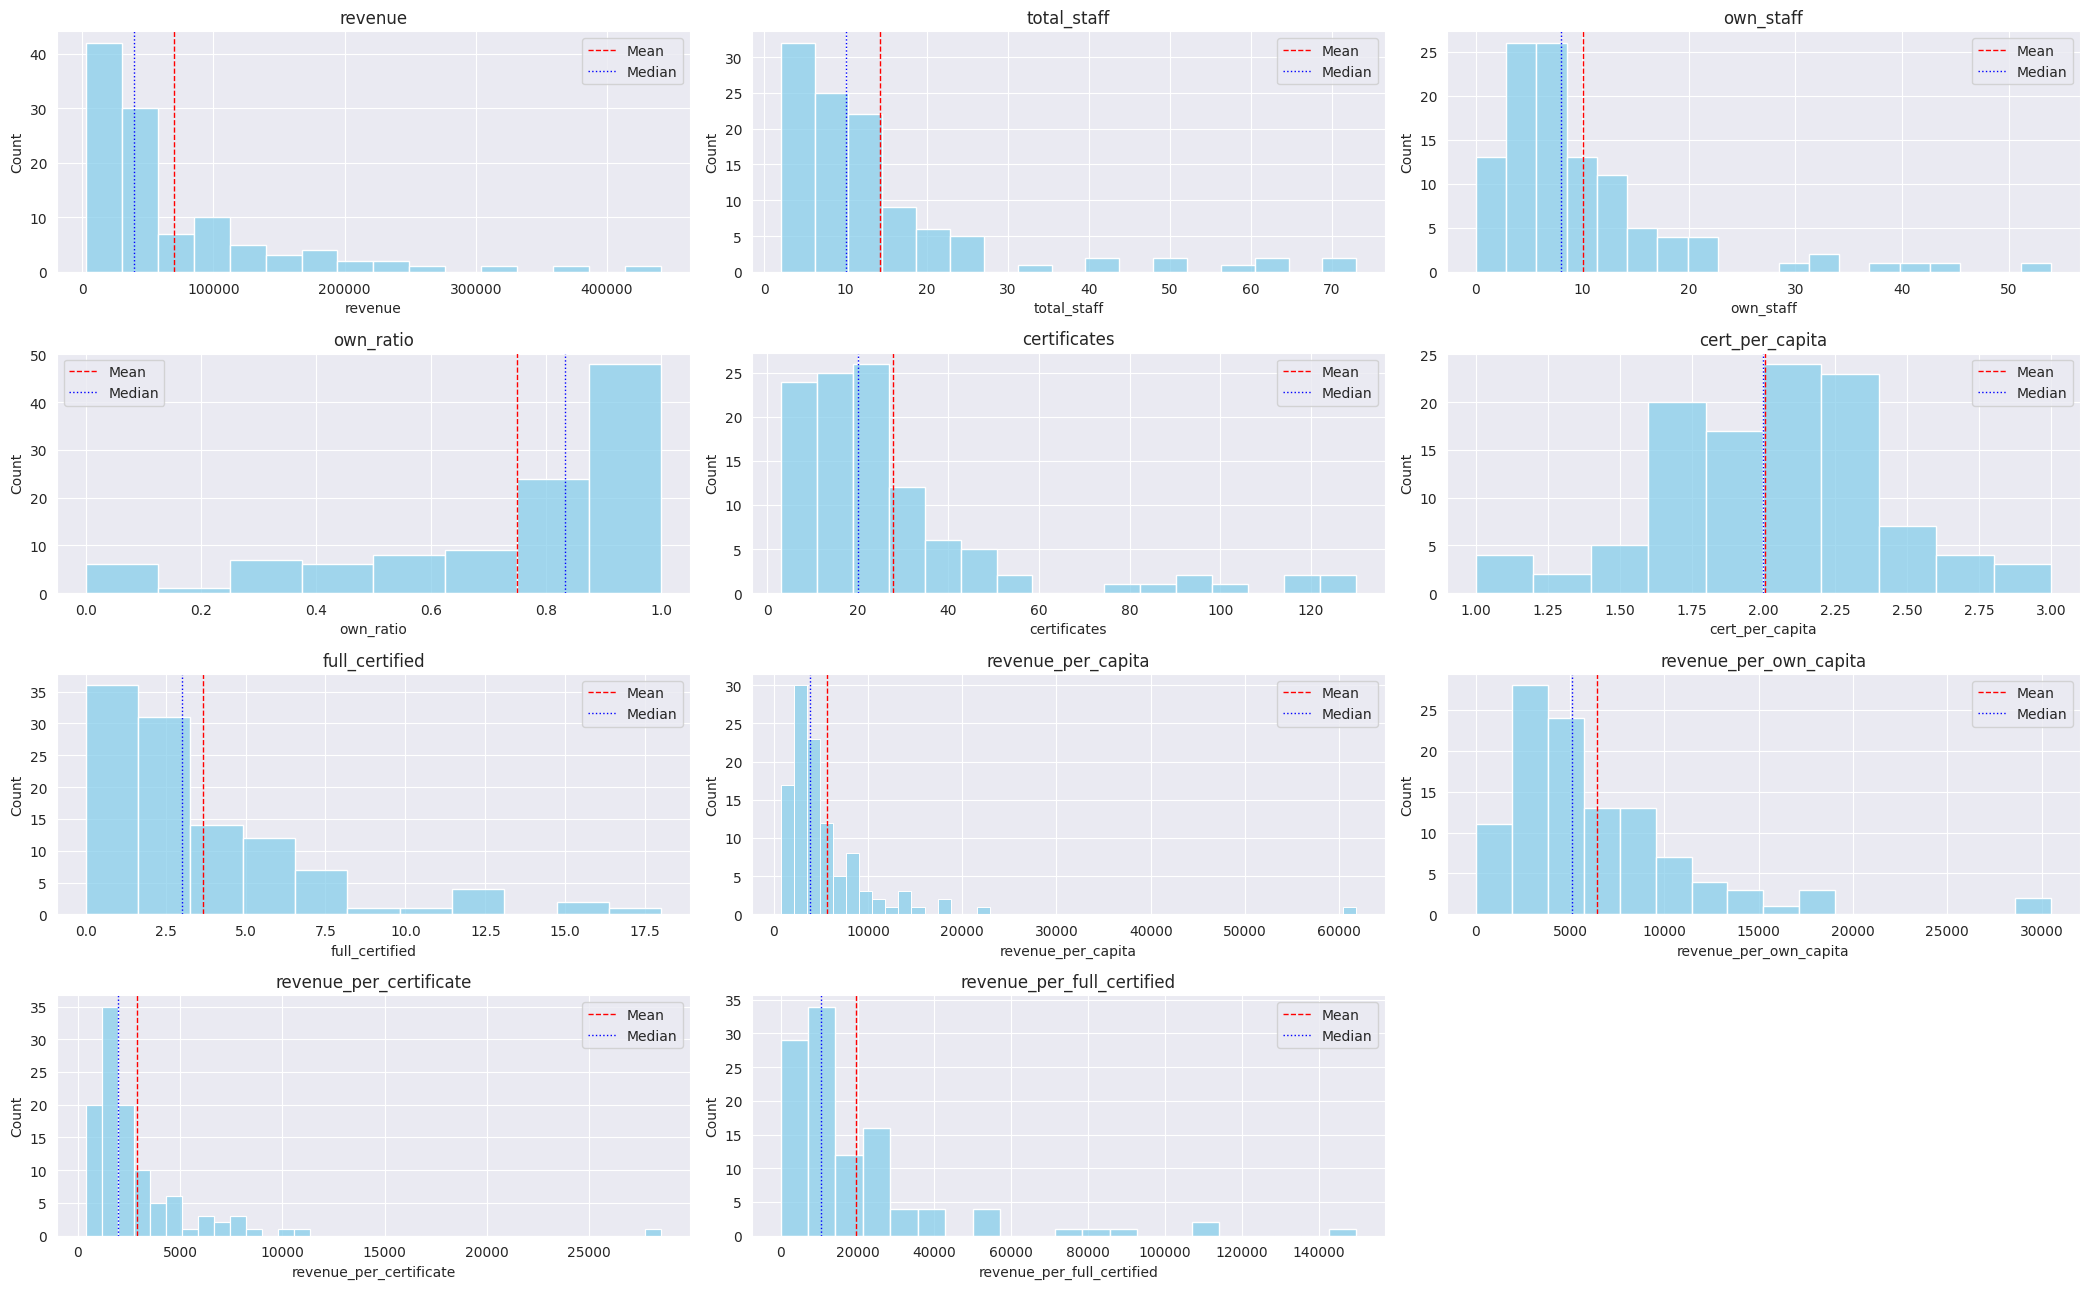

In [31]:
# Set up a grid for subplots
ncols = 3
nrows = (len(numeric_columns) + ncols - 1) // ncols
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(21, 13))
axes = axes.flatten()

# Create histograms for each numeric column
for idx, col in enumerate(numeric_columns):
    ax = axes[idx]
    # Histogram plot
    sns.histplot(revenue_staff[col].dropna(), ax=ax, kde=False, color='skyblue')
    
    # Calculate mean and median
    mean_val = revenue_staff[col].mean()
    median_val = revenue_staff[col].median()
    
    # Plot vertical lines for mean and median
    ax.axvline(mean_val, color='red', linestyle='--', linewidth=1, label='Mean')
    ax.axvline(median_val, color='blue', linestyle=':', linewidth=1, label='Median')
    
    ax.set_title(col)
    ax.legend()
    ax.grid(True)

# Remove empty subplots if any
for j in range(idx + 1, len(axes)):
    fig.delaxes(axes[j])

fig.tight_layout()
plt.show()

Построим также диаграммы рассеяния для переменной "выручка" в естественных шкалах.

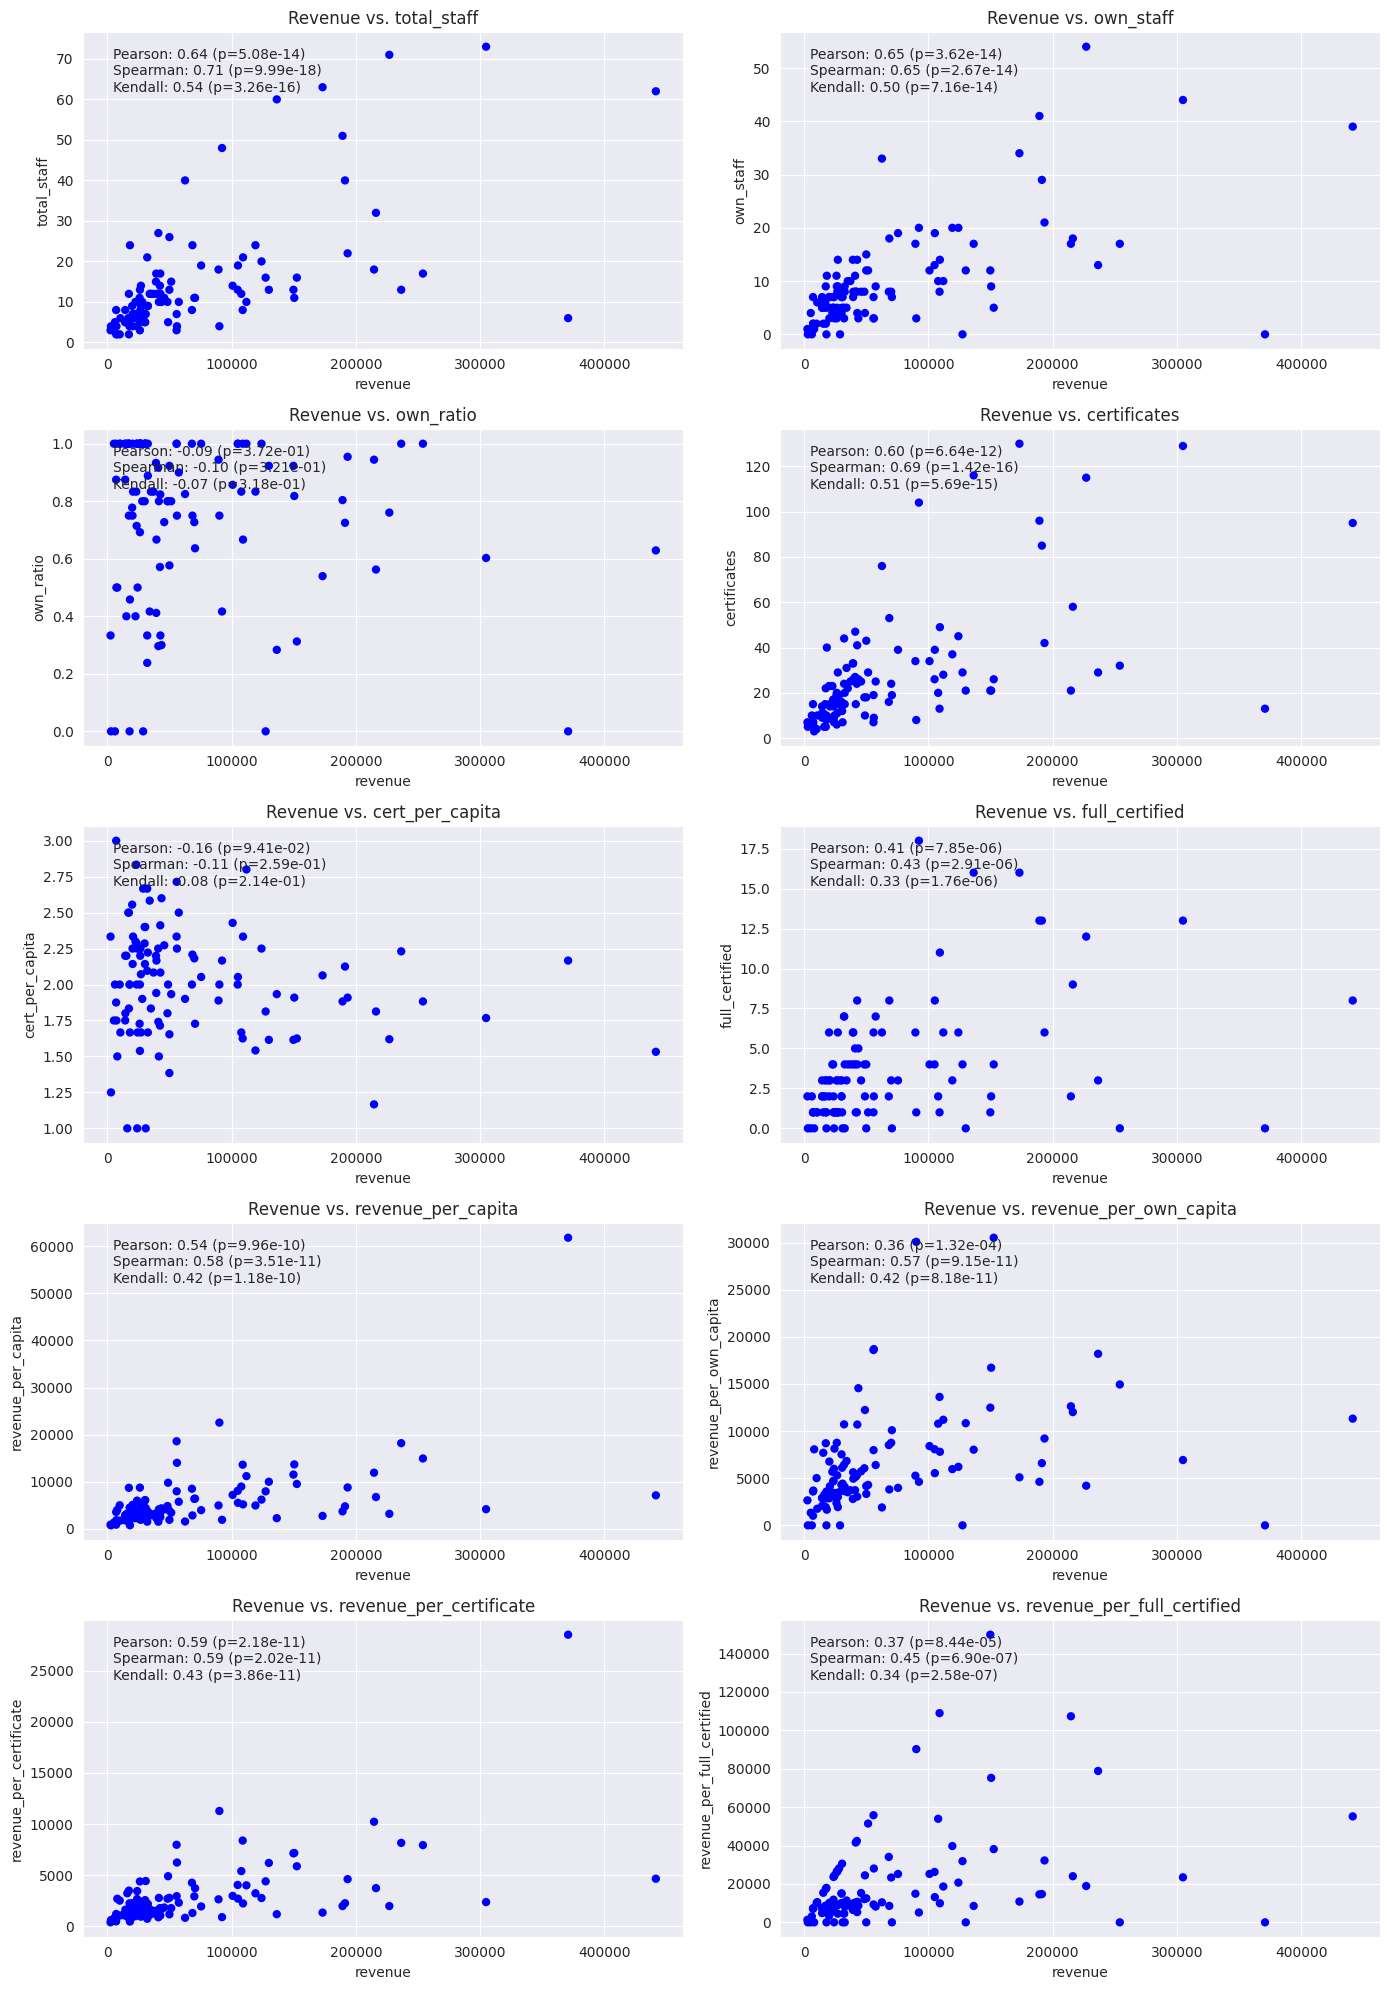

In [27]:
# List of variables to compare with 'revenue'
comparison_columns = ['total_staff', 'own_staff', 'own_ratio', 'certificates',
                      'cert_per_capita', 'full_certified', 'revenue_per_capita',
                      'revenue_per_own_capita', 'revenue_per_certificate',
                      'revenue_per_full_certified']

# Set up the plotting grid
ncols = 2
nrows = (len(comparison_columns) + ncols - 1) // ncols
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(14, 4 * nrows))
axes = axes.flatten()

# Iterate over each comparison column to create scatter plots
for idx, col in enumerate(comparison_columns):
    ax = axes[idx]
    sns.scatterplot(x='revenue', y=col, data=revenue_staff, ax=ax, color='blue', edgecolor='none')
    
    # Calculate correlations and p-values
    pearson_corr, pearson_p = pearsonr(revenue_staff['revenue'].dropna(), revenue_staff[col].dropna())
    spearman_corr, spearman_p = spearmanr(revenue_staff['revenue'].dropna(), revenue_staff[col].dropna())
    kendall_corr, kendall_p = kendalltau(revenue_staff['revenue'].dropna(), revenue_staff[col].dropna())
    
    # Annotate the plot with the correlation coefficients and p-values
    ax.annotate(f"Pearson: {pearson_corr:.2f} (p={pearson_p:.2e})\n"
                f"Spearman: {spearman_corr:.2f} (p={spearman_p:.2e})\n"
                f"Kendall: {kendall_corr:.2f} (p={kendall_p:.2e})",
                xy=(0.05, 0.95), xycoords='axes fraction', verticalalignment='top')
    
    ax.set_title(f'Revenue vs. {col}')
    ax.grid(True)

# Adjust layout and remove any unused axes
for j in range(idx + 1, len(axes)):
    axes[j].set_visible(False)

fig.tight_layout()
plt.show()

Построим аналогичные диаграммы для логарифмов.

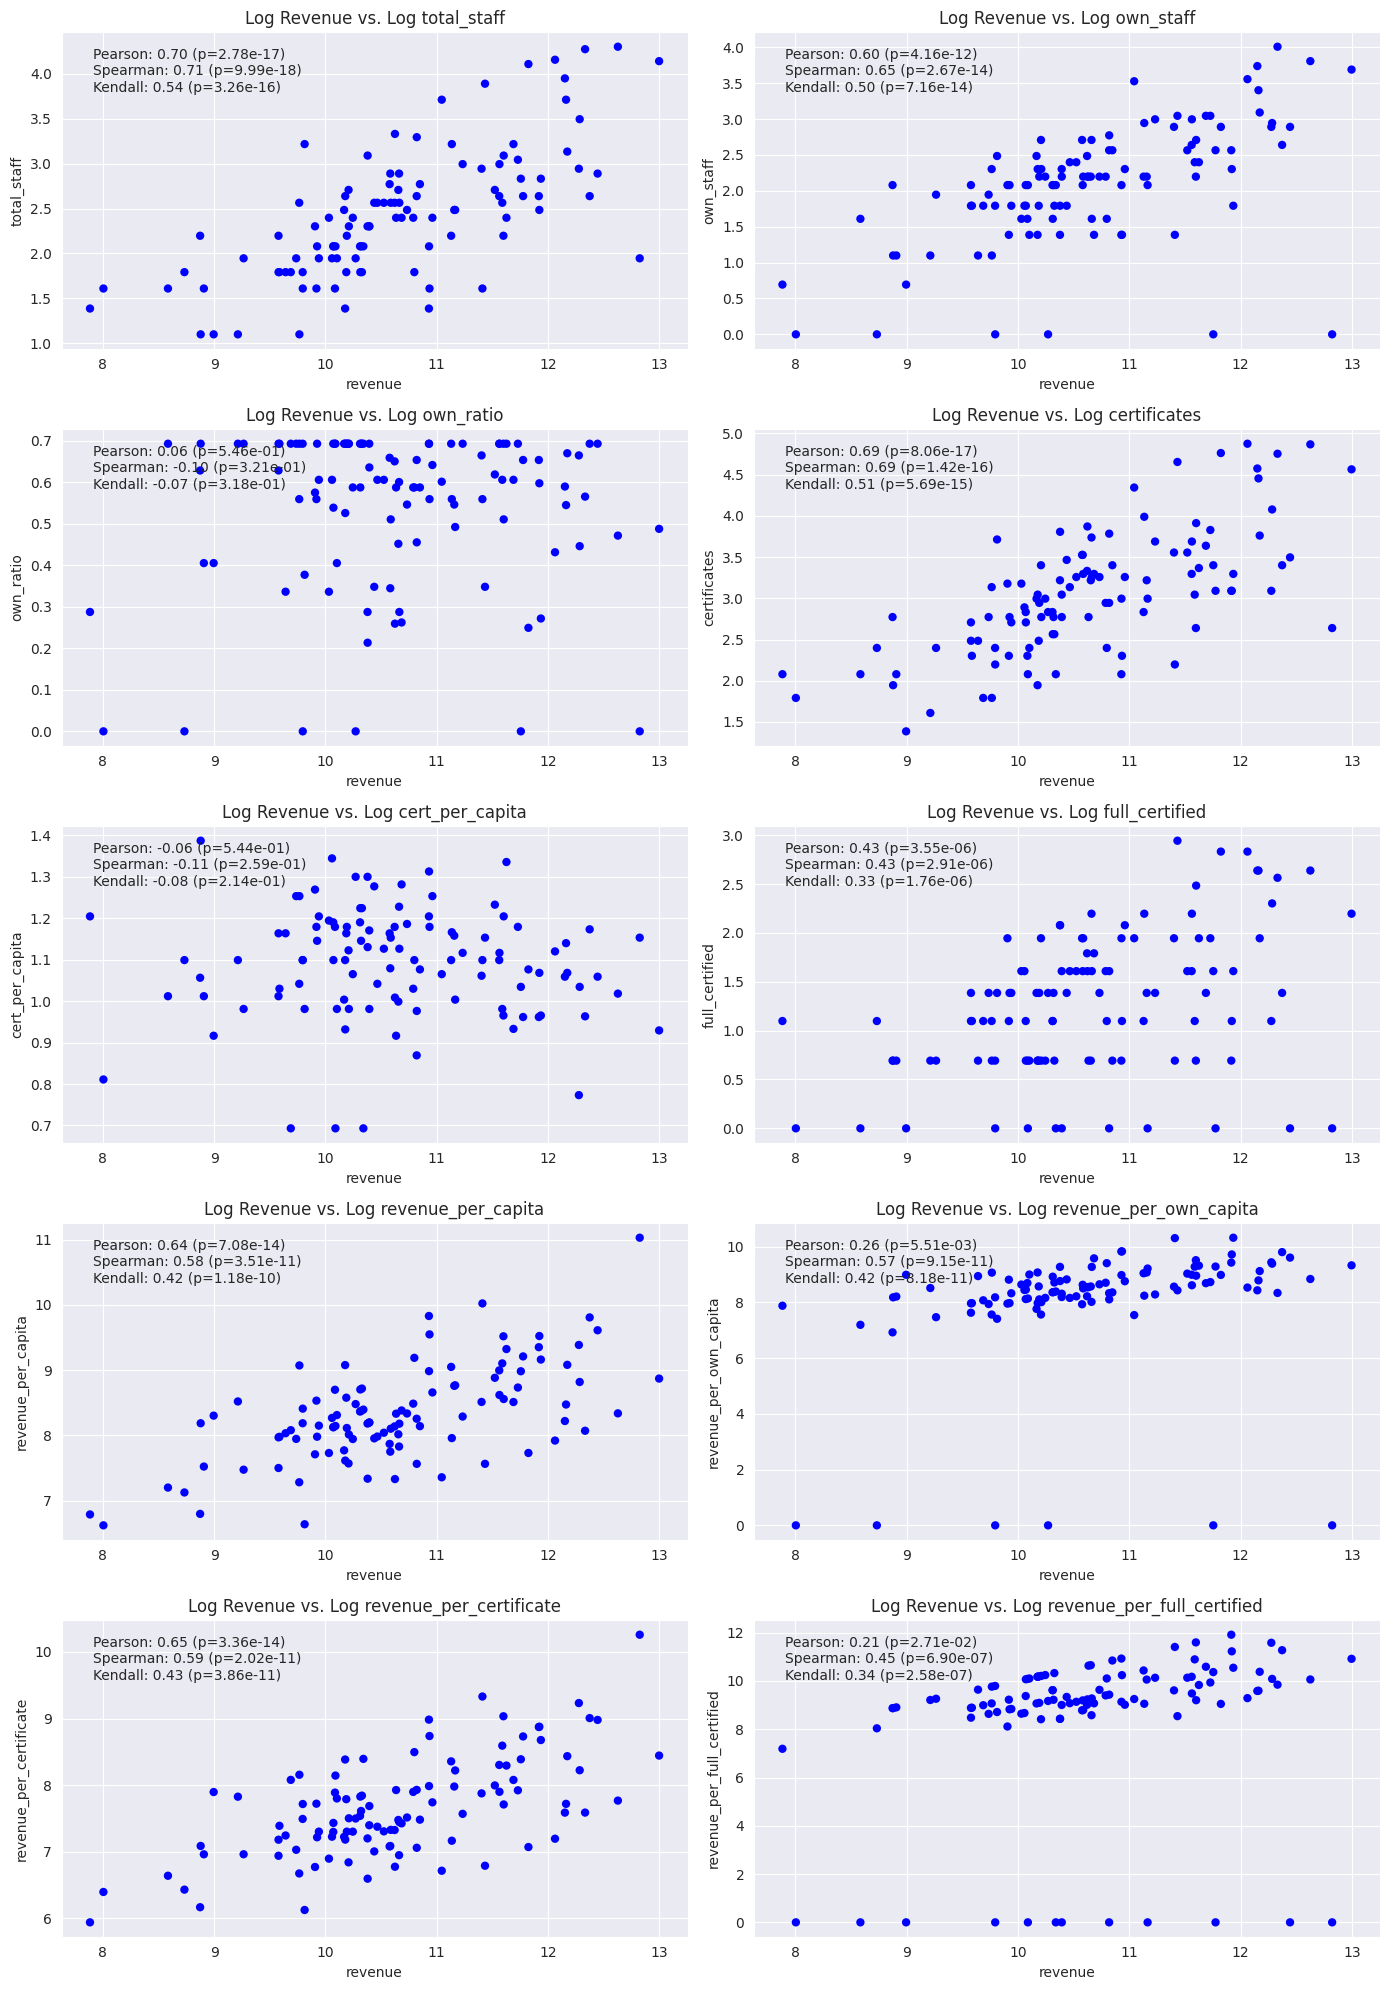

In [28]:
# Set up the plotting grid
ncols = 2
nrows = (len(comparison_columns) + ncols - 1) // ncols
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(14, 4 * nrows))
axes = axes.flatten()

# Iterate over each comparison column to create scatter plots with logarithmic transformations
for idx, col in enumerate(comparison_columns):
    ax = axes[idx]
    # Apply logarithm transformation with a small constant shift
    x_data = np.log(revenue_staff['revenue'] + 1)
    y_data = np.log(revenue_staff[col] + 1)

    sns.scatterplot(x=x_data, y=y_data, ax=ax, color='blue', edgecolor='none')
    
    # Calculate correlations and p-values
    pearson_corr, pearson_p = pearsonr(x_data.dropna(), y_data.dropna())
    spearman_corr, spearman_p = spearmanr(x_data.dropna(), y_data.dropna())
    kendall_corr, kendall_p = kendalltau(x_data.dropna(), y_data.dropna())
    
    # Annotate the plot with the correlation coefficients and p-values
    ax.annotate(f"Pearson: {pearson_corr:.2f} (p={pearson_p:.2e})\n"
                f"Spearman: {spearman_corr:.2f} (p={spearman_p:.2e})\n"
                f"Kendall: {kendall_corr:.2f} (p={kendall_p:.2e})",
                xy=(0.05, 0.95), xycoords='axes fraction', verticalalignment='top')
    
    ax.set_title(f'Log Revenue vs. Log {col}')
    ax.grid(True)

# Adjust layout and remove any unused axes
for j in range(idx + 1, len(axes)):
    axes[j].set_visible(False)

fig.tight_layout()
plt.show()

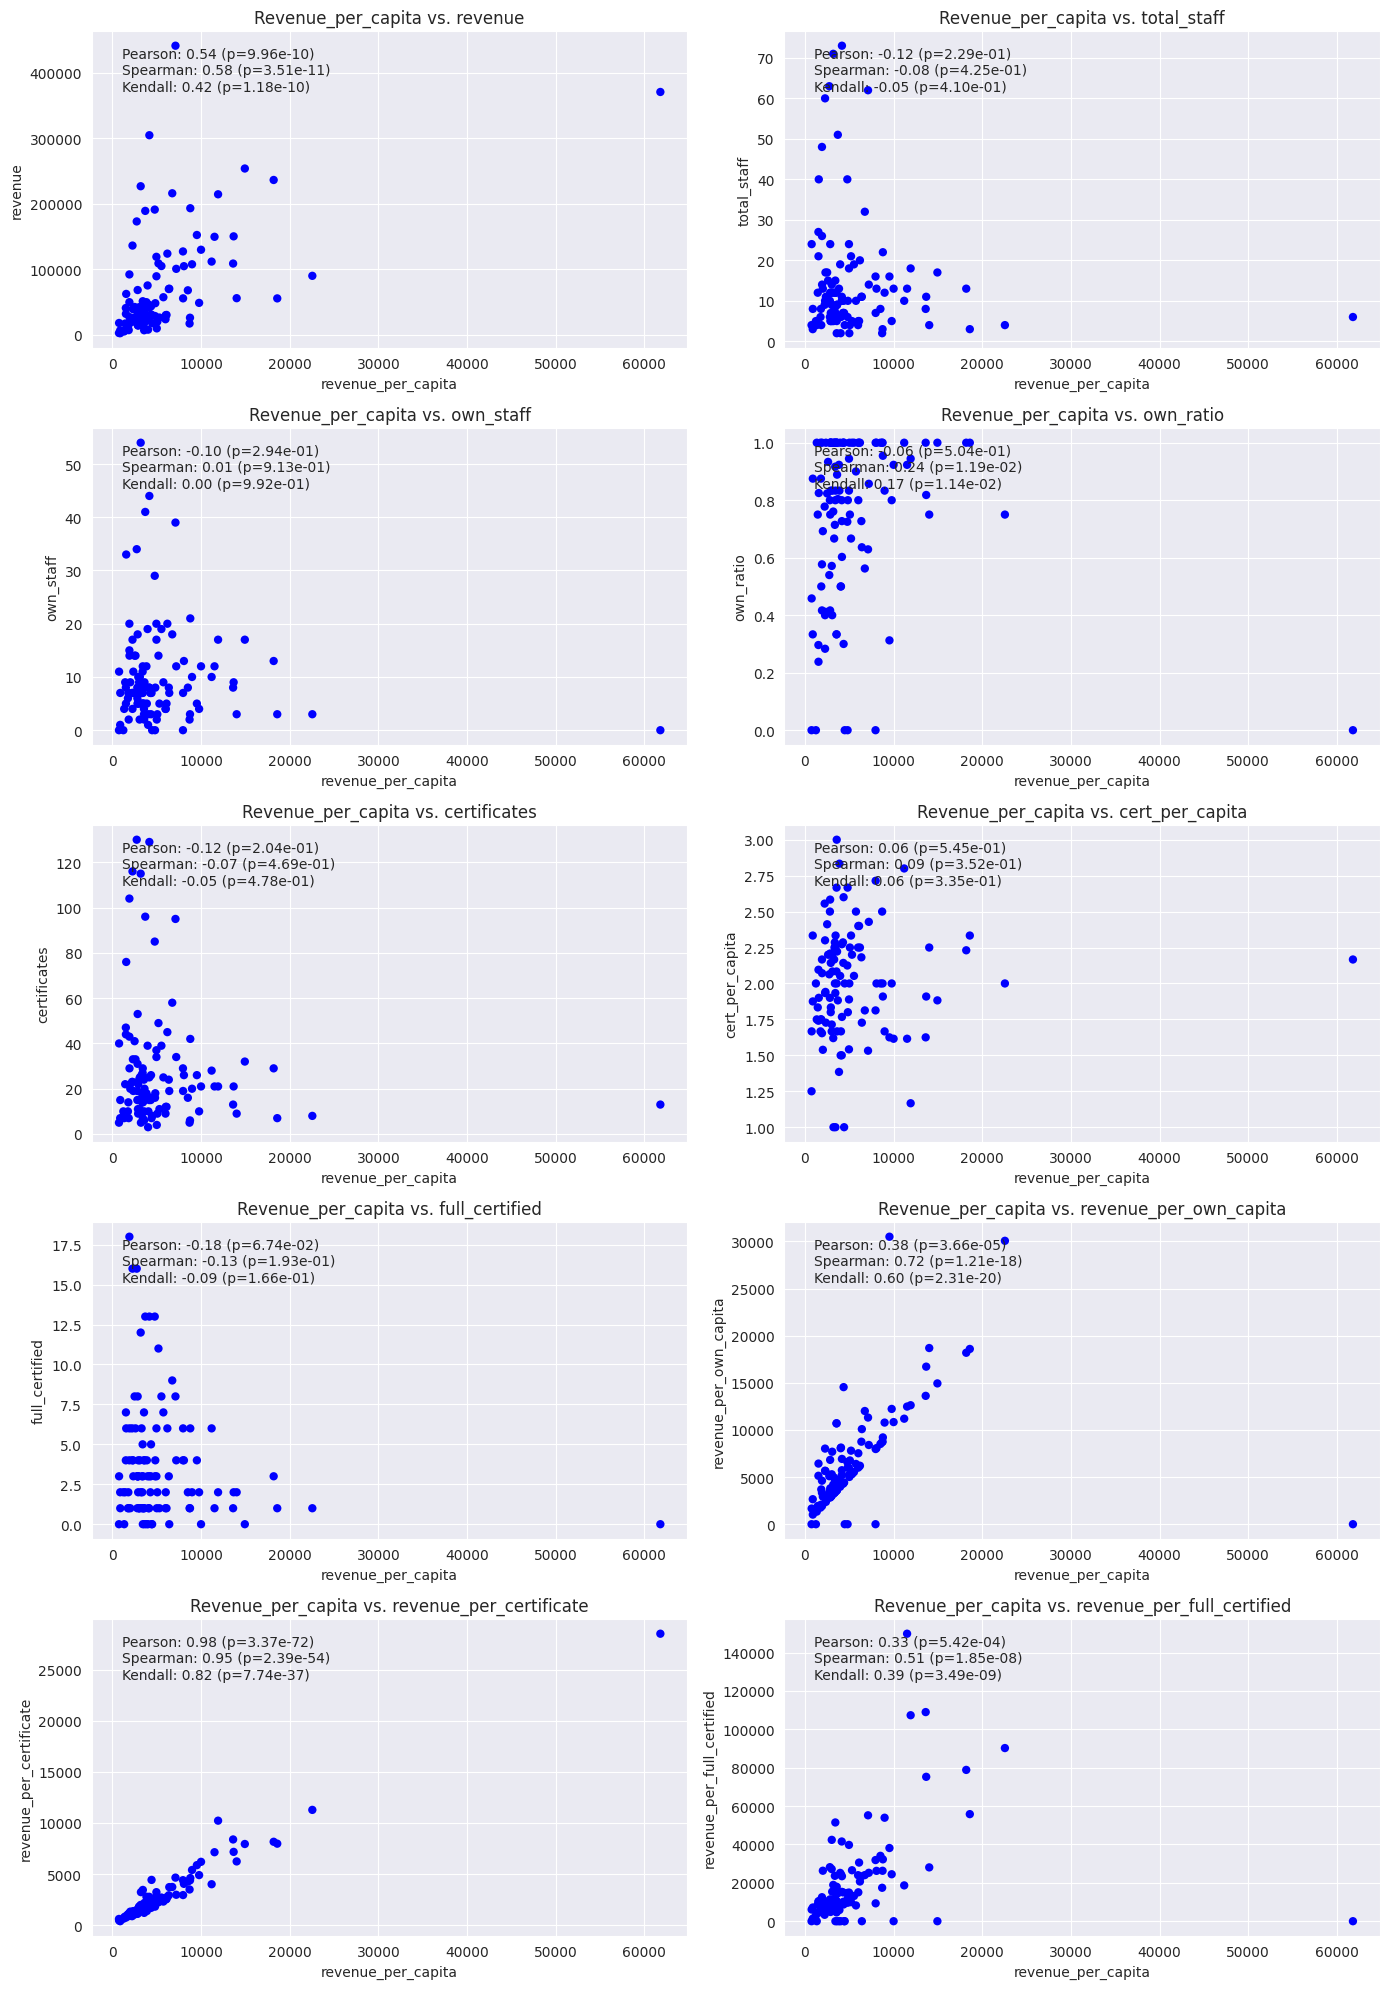

In [29]:
# List of variables to compare with 'revenue'
log_comparison_columns = ['revenue', 'total_staff', 'own_staff', 'own_ratio', 'certificates',
                          'cert_per_capita', 'full_certified', 'revenue_per_own_capita',
                          'revenue_per_certificate', 'revenue_per_full_certified']

# Set up the plotting grid
ncols = 2
nrows = (len(comparison_columns) + ncols - 1) // ncols
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(14, 4 * nrows))
axes = axes.flatten()

# Iterate over each comparison column to create scatter plots
for idx, col in enumerate(log_comparison_columns):
    ax = axes[idx]
    sns.scatterplot(x='revenue_per_capita', y=col, data=revenue_staff, ax=ax, color='blue', edgecolor='none')
    
    # Calculate correlations and p-values
    pearson_corr, pearson_p = pearsonr(revenue_staff['revenue_per_capita'].dropna(), revenue_staff[col].dropna())
    spearman_corr, spearman_p = spearmanr(revenue_staff['revenue_per_capita'].dropna(), revenue_staff[col].dropna())
    kendall_corr, kendall_p = kendalltau(revenue_staff['revenue_per_capita'].dropna(), revenue_staff[col].dropna())
    
    # Annotate the plot with the correlation coefficients and p-values
    ax.annotate(f"Pearson: {pearson_corr:.2f} (p={pearson_p:.2e})\n"
                f"Spearman: {spearman_corr:.2f} (p={spearman_p:.2e})\n"
                f"Kendall: {kendall_corr:.2f} (p={kendall_p:.2e})",
                xy=(0.05, 0.95), xycoords='axes fraction', verticalalignment='top')
    
    ax.set_title(f'Revenue_per_capita vs. {col}')
    ax.grid(True)

# Adjust layout and remove any unused axes
for j in range(idx + 1, len(axes)):
    axes[j].set_visible(False)

fig.tight_layout()
plt.show()

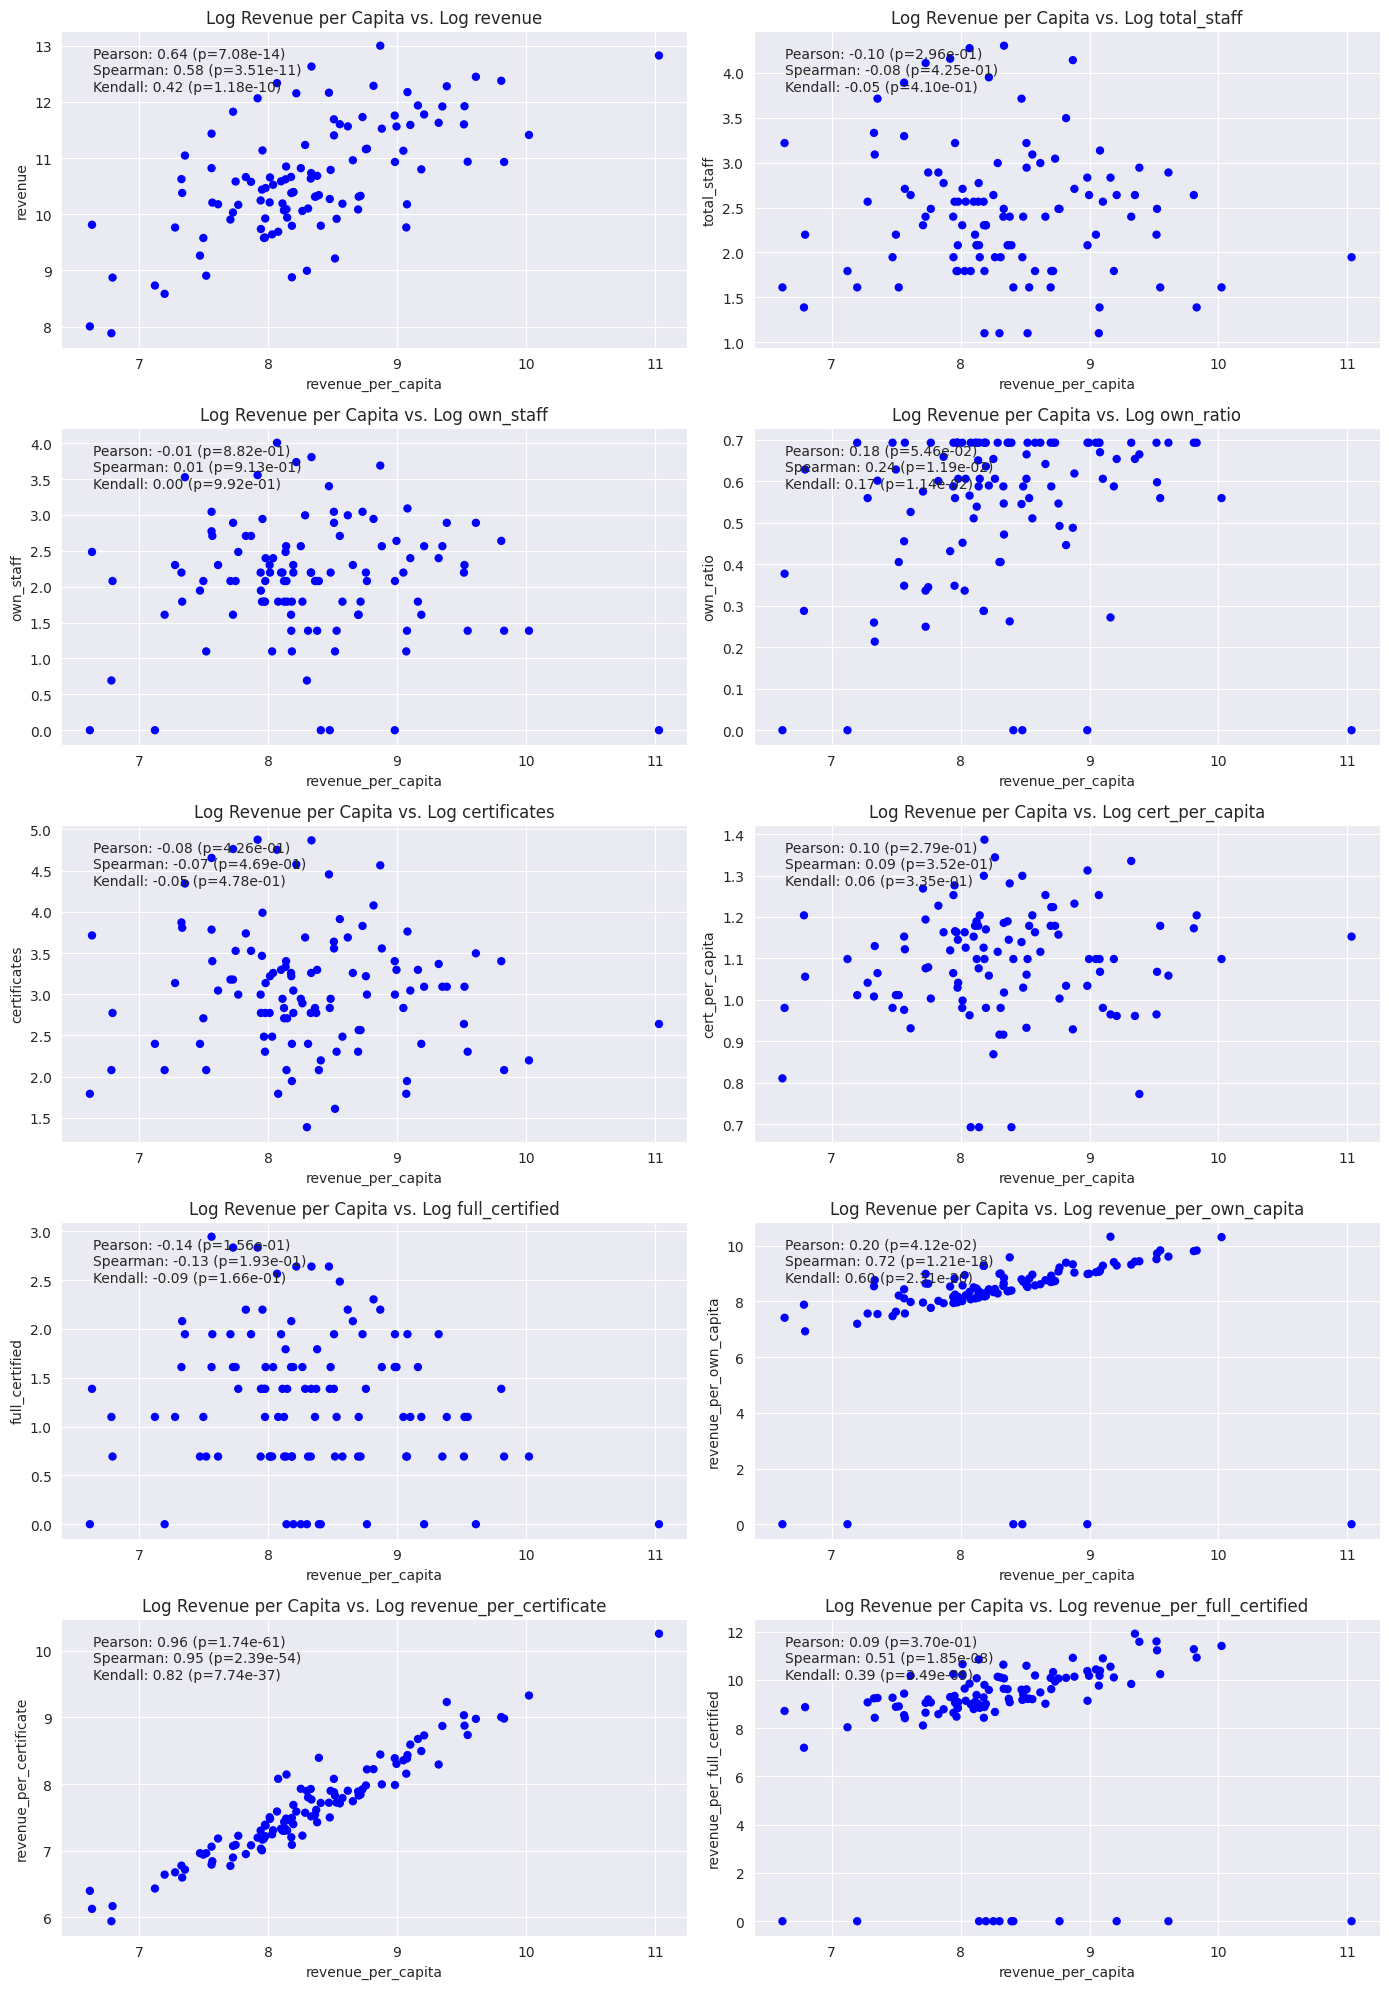

In [30]:
# Set up the plotting grid
ncols = 2
nrows = (len(comparison_columns) + ncols - 1) // ncols
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(14, 4 * nrows))
axes = axes.flatten()

# Iterate over each comparison column to create scatter plots with logarithmic transformations
for idx, col in enumerate(log_comparison_columns):
    ax = axes[idx]
    # Apply logarithm transformation with a small constant shift
    x_data = np.log(revenue_staff['revenue_per_capita'] + 1)
    y_data = np.log(revenue_staff[col] + 1)

    sns.scatterplot(x=x_data, y=y_data, ax=ax, color='blue', edgecolor='none')
    
    # Calculate correlations and p-values
    pearson_corr, pearson_p = pearsonr(x_data.dropna(), y_data.dropna())
    spearman_corr, spearman_p = spearmanr(x_data.dropna(), y_data.dropna())
    kendall_corr, kendall_p = kendalltau(x_data.dropna(), y_data.dropna())
    
    # Annotate the plot with the correlation coefficients and p-values
    ax.annotate(f"Pearson: {pearson_corr:.2f} (p={pearson_p:.2e})\n"
                f"Spearman: {spearman_corr:.2f} (p={spearman_p:.2e})\n"
                f"Kendall: {kendall_corr:.2f} (p={kendall_p:.2e})",
                xy=(0.05, 0.95), xycoords='axes fraction', verticalalignment='top')
    
    ax.set_title(f'Log Revenue per Capita vs. Log {col}')
    ax.grid(True)

# Adjust layout and remove any unused axes
for j in range(idx + 1, len(axes)):
    axes[j].set_visible(False)

fig.tight_layout()
plt.show()